In [35]:
# -*- coding: utf-8 -*-
"""
Created on Sat Nov 17 13:21:25 2018
@author: Ken

Modified by MinhKhang Nguyen
July 09 2020 3:04 PM
"""

'\nCreated on Sat Nov 17 13:21:25 2018\n@author: Ken\n\nModified by MinhKhang Nguyen\nJuly 2020\n'

In [36]:
import pandas as pd 
import random as rnd
import numpy as np 
import matplotlib.pyplot as plt

In [114]:
gdf = pd.read_csv('regssdatacsv.csv')

In [115]:
gdf.columns

Index(['Row', 'Tm', 'Game', 'Date', 'Home/Away', 'Opp', 'Result', 'TeamPTS',
       'OpponentPTS', 'TeamFG', 'TeamFGA', 'TeamFGP', 'Team3P', 'Team3PA',
       'Team3PP', 'TeamFT', 'TeamFTA', 'TeamFTP', 'OpponentFG', 'OpponentFGA',
       'OpponentFGP', 'Opponent3P', 'Opponent3PA', 'Opponent3PP', 'OpponentFT',
       'OpponentFTA', 'OpponentFTP'],
      dtype='object')

In [177]:
UTAdf = gdf[gdf.Tm == 'UTA']
NOPdf = gdf[gdf.Tm == 'NOP']


In [178]:
UTAdf.Date = UTAdf.Date.apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d', errors='ignore'))
UTAdf = UTAdf[(UTAdf['Date'] > pd.to_datetime('20191023', format='%Y%m%d', errors='ignore')) & (UTAdf['Date'] <= pd.to_datetime('20200309', format='%Y%m%d', errors='ignore'))]

NOPdf.Date = NOPdf.Date.apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d', errors='ignore'))
NOPdf = NOPdf[(NOPdf['Date'] > pd.to_datetime('20191022', format='%Y%m%d', errors='ignore'))& (NOPdf['Date'] <= pd.to_datetime('20200308', format='%Y%m%d', errors='ignore'))]


TypeError: '>' not supported between instances of 'str' and 'Timestamp'

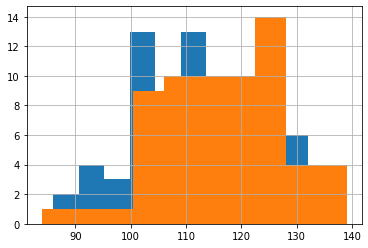

In [179]:
UTAdf.TeamPTS.hist()
NOPdf.TeamPTS.hist()

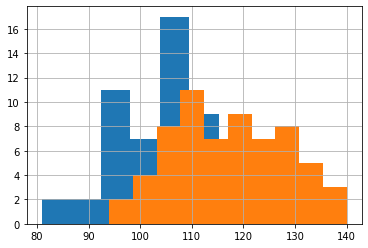

In [180]:
UTAdf.OpponentPTS.hist()
NOPdf.OpponentPTS.hist()

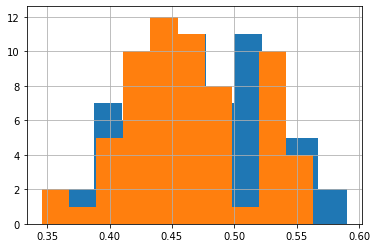

In [182]:
UTAdf.TeamFGP.hist()
NOPdf.TeamFGP.hist()

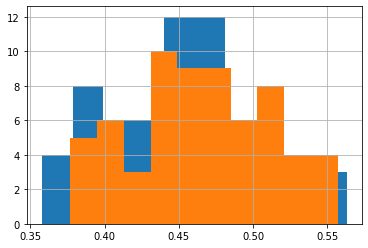

In [183]:
UTAdf.OpponentFGP.hist()
NOPdf.OpponentFGP.hist()

In [184]:
UTAmeanpts = UTAdf.TeamPTS.mean()
NOPmeanpts = NOPdf.TeamPTS.mean()
UTAfgp = UTAdf.TeamFGP.mean()
NOPfgp = NOPdf.TeamFGP.mean()
UTAsdpts = UTAdf.TeamPTS.std()
NOPsdpts = NOPdf.TeamPTS.std()

UTAmeaNOPp = UTAdf.OpponentPTS.mean()
NOPmeaNOPp = NOPdf.OpponentPTS.mean()
UTAfgpopp = UTAdf.OpponentFGP.mean()
NOPfgpopp = NOPdf.OpponentFGP.mean()
UTAsdopp = UTAdf.OpponentPTS.std()
NOPsdopp = NOPdf.OpponentPTS.std()

print("UTA Mean ", UTAmeanpts)
print("UTA FG% ", UTAfgp)
print("UTA Points Standard Deviation ", UTAsdpts)
print("NOP Points Mean ", NOPmeanpts)
print("NOP FG% ", NOPfgp)
print("NOP Points Standard Deviation ", NOPsdpts)

print("UTA OppPoints Mean ", UTAmeaNOPp)
print("UTA OppFG% Mean ", UTAfgpopp)
print("UTA OppPoints SD ", UTAsdopp)
print("NOP OppPoints Mean ", NOPmeaNOPp)
print("NOP OppFG% Mean ", NOPfgpopp)
print("NOP OppPoints SD ", NOPsdopp)

UTA Mean  111.03125
UTA FG%  0.47518750000000004
UTA Points Standard Deviation  11.168221284818218
NOP Points Mean  116.1875
NOP FG%  0.463859375
NOP Points Standard Deviation  11.105375503753354
UTA OppPoints Mean  107.859375
UTA OppFG% Mean  0.45240624999999995
UTA OppPoints SD  11.85610443196193
NOP OppPoints Mean  117.015625
NOP OppFG% Mean  0.4664218749999999
NOP OppPoints SD  11.269416665654305


In [185]:
def gameSim():
    UTAScore = (rnd.gauss(UTAmeanpts,UTAsdpts)+ rnd.gauss(NOPmeaNOPp,NOPsdopp))/2
    NOPScore = (rnd.gauss(NOPmeanpts,NOPsdpts)+ rnd.gauss(NOPmeaNOPp,NOPsdopp))/2
    if int(round(UTAScore)) > int(round(NOPScore)):
        return 1
    elif int(round(UTAScore)) < int(round(NOPScore)):
        return -1
    else: return 0

In [186]:
def gAmesSim(ns):
    gamesout = []
    team1win = 0
    team2win = 0
    for i in range(ns):
        gm = gameSim()
        gamesout.append(gm)
        if gm == 1:
            team1win +=1 
        elif gm == -1:
            team2win +=1
    print('UTA Win ', team1win/(team1win+team2win),'%')
    print('NOP Win ', team2win/(team1win+team2win),'%')
    return gamesout
        

In [187]:
gAmesSim(10000)

UTA Win  0.40462548182102304 %
NOP Win  0.595374518178977 %


[-1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 0,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 0,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 0,
 1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 0,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 0,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 0,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 0,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 0,
 -1,
 -1,
 -1,
 -1,
 -1,
 0,
 -1,
 -1,
 1,
 -1,
 1,
 